In [3]:
from src.data.DeloitteDataset import split_dataset

train_dataset, valid_dataset, test_dataset = split_dataset(
        '../data/raw/carseg_data/clean_data', 
        '../references/test_set_ids.txt',
        transform_img=None,
        transform_both=None,
        data_real=True,
        synthetic_data_ratio=0.05,
        train_valid_duplicate=1
    )

print("== DATASET SIZES ==")
print('Training set:', len(train_dataset))
print('Validation set:', len(valid_dataset))
print('Test set:', len(test_dataset))

== DATASET SIZES ==
Training set: 1115
Validation set: 197
Test set: 30


In [15]:
# IMPORTS

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2

from src.visualization.visualization_fct import mask_to_rgb

(-0.5, 255.5, 255.5, -0.5)

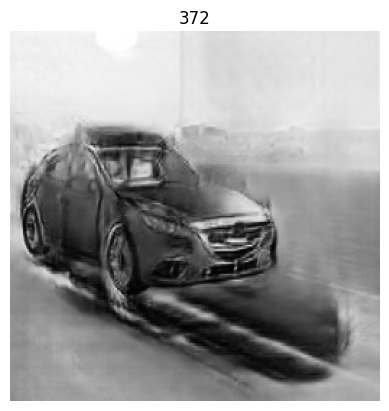

In [16]:
anIndex = 2
img_ex = (np.transpose(valid_dataset.get_rawImg(anIndex).detach().numpy(), (1, 2, 0))).astype(int)

plt.title(valid_dataset.data_list[anIndex].stem)
plt.imshow(img_ex) 
plt.axis(False)

In [34]:
# export
for i in tqdm(range(len(valid_dataset))):
    img_ex = (np.transpose(valid_dataset.get_rawImg(i).detach().numpy(), (1, 2, 0))).astype(int)
    img_ex = img_ex[:, :, [2, 1, 0]]
    filename = valid_dataset.data_list[i].stem + '.png'
    cv2.imwrite('deloitte_valid_samples/'+filename, img_ex)

100%|██████████| 197/197 [00:03<00:00, 65.61it/s]


In [36]:
# export
for i in tqdm(range(len(test_dataset))):
    img_ex = (np.transpose(test_dataset.get_rawImg(i).detach().numpy(), (1, 2, 0))).astype(int)
    img_ex = img_ex[:, :, [2, 1, 0]]
    filename = test_dataset.data_list[i].stem + '.png'
    cv2.imwrite('deloitte_test_samples/'+filename, img_ex)

100%|██████████| 30/30 [00:00<00:00, 67.80it/s]
